# Tokenization

Load the text "The Time Machine" by H.G. Wells from your txt-file into a string variable.

In [5]:
from re import findall

import requests

text_file_url = 'https://www.gutenberg.org/files/35/35-0.txt'

response_1 = requests.get(text_file_url)

with open('time_machine.txt','w', encoding='utf-8') as f:         # to write unicode characters we use encoding as utf-8
    f.write(response_1.text)     # we need to use .text for text content instead of .content
with open('time_machine.txt','r',encoding='utf-8') as file:
    text=file.read().rstrip()
    



## Familiarize with NLTK 
- install it into your environment
- find the methods word_tokenize and sent_tokenize
- your will realize that you need to do more installation steps on the first use

Warmup 
- Subdivide the text into sentences using the nltk.sent_tokenize method.
- Compare the sentences to those you have found manually using regex.
- Subdivide the text into words.
- Repeat the sentence tokenization with the text completely switched to lower case. What do you recognize? 


In [6]:
#TODO Imports first
import nltk


In [7]:
# using the nltk.sent_tokenize() to subdivide the text into sentances.
print(len(nltk.sent_tokenize(text)))

1942


In [8]:
# using the nltk.word_tokenize() to subdivide the text into word tokens.
print(len(nltk.word_tokenize(text)))

41041


In [9]:
# using str.lower() to lowercase the string and then nltk to tokenize it.
print(len(nltk.sent_tokenize(text.lower())))

1932


ANSWER= we have less 9 less sentences

A little bit of analysis!

Which sentences are different in sent_lower (don't forget to add the lower case transformation!)

In [10]:
# pending

Within the first couple of sentences you already find one case where the sentence tokenization deviates for lower case and normal text. Comment on your finding.

**Homework**: Compare the sentences found by nltk.sent_tokenize to your manually found sentences from the previous notebook. 

## Word tokenization

Use the NLTK word tokenizer. 
- First, familiarize how it handles special situations like those mentioned in the lecture: ellipsis, IP addresses, decimal numbers, clitic contractions and others you are thinking of. Create a text containing all these things and tokenize it.

- Use the NLTK word_tokenize function to subdivide The Time Machine into words.
- Tokenize The Time Machine using a regex-based word tokenizer. Compare the results by counting occurrences of words in both versions and comparing the counts. 


In [11]:
#TODO
example_string="Dr. Smith lives at 192.168.1.1, which is his private network's IP address. "
tokens=nltk.word_tokenize(example_string)
len(tokens),print(tokens)

['Dr.', 'Smith', 'lives', 'at', '192.168.1.1', ',', 'which', 'is', 'his', 'private', 'network', "'s", 'IP', 'address', '.']


(15, None)

In [12]:
import re
def word_tokenizer(text:str):
    pattern=r"\b\w+(?:[-']\w+)?(?:'\w+)?\b"
    tokens=re.findall(pattern,text)
    return tokens

re_tokens=word_tokenizer(text)

nltk_tokes=nltk.word_tokenize(text)

print(len(re_tokens),len(nltk_tokes))

35898 41041


### Wordcloud
A good visualization of texts is the so-called word cloud. 
It shows all words that occur but with different text sizes depending on the number of occurrences. 

- Create a word cloud for The Time Machine
- Install (if not already done) WordCloud Python-Package first and plot your results with matplotlib (imshow function)

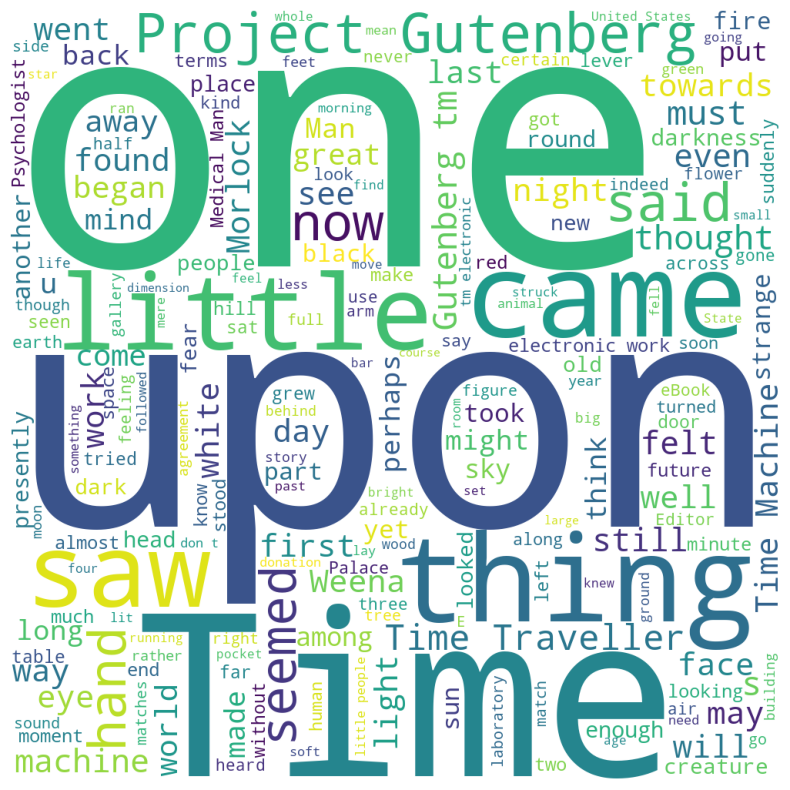

In [13]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud= WordCloud(width=1000,height=1000, background_color='white',).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(cloud) 
plt.axis('off')
plt.show()


## Lemmatization

- Perform lemmatization on The Time Machine. Use the 
    - Porter stemmer
    - Lancester stemmer
    - WordNet lemmatizer

- Compare your results with the original text.
- For all word stems created by the Porter stemmer, which are not included in the stems from Lancaster find the most similar stem by considering the edit distance (use NLTK).


In [22]:
import nltk
from nltk.stem import PorterStemmer,LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kashi\AppData\Roaming\nltk_data...


True

In [23]:
tokenized_text=nltk.word_tokenize(text)
p_stems=[PorterStemmer().stem(word) for word in tokenized_text ]
L_stems=[LancasterStemmer().stem(word) for word in tokenized_text ]
W_stems=[WordNetLemmatizer().lemmatize(word) for word in tokenized_text ]

In [29]:
# compare words pending

In [28]:
if p_stems==L_stems==W_stems==nltk.word_tokenize(text):
if p_stems==L_stems==W_stems==nltk.word_tokenize(text):
    print(True)

In [16]:
from nltk.metrics.distance import edit_distance


In [17]:
#TODO